<a href="https://colab.research.google.com/github/riskydevandra/soft_computing_praktik/blob/main/nndl_m12_5200411476.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Risky Devandra H


---


Nim : 5200411476

In [53]:
import numpy as np  
import random 
import matplotlib.pyplot as plt

In [54]:
#Inisialisasi parameter Ga
list_barang = [[5,20],[7,90],[3,50],[6,60],[1,100],
               [9,30],[4,30],[4,30],[6,70],[4,50]]  #[berat prioristas]

max_berat = 25 
uk_pop = 50
max_generasi = 100
bts_bawah = 0 
bts_atas = 15
jum_var = len(list_barang)
jum_gen_per_var = 1
jum_gen = jum_var * jum_gen_per_var
pc = 0.8
pm = 1 / jum_gen
best_kromosom = []
best_fitness = 0
best_genotipe = []
list_best_fitness = []
max_fitness = 999999


In [55]:
#inisialisai populasi biner
kromosom = np.round(np.random.rand(uk_pop, jum_gen))

In [56]:
def hitung_fitness(x, list_barang, max_berat):
  #hitung total barang 
  total_berat = 0
  for i in range(len(x)):
    total_berat = total_berat + (x[i] * list_barang[i][0])


  #hitung fitness
  fitness = 0
  if (total_berat <= max_berat):
    for i in range(len(x)) :
      fitness = fitness + (x[i] * list_barang[i][1])


      #fitness dikurangi jika ada space yang tidak terpakai

      fitness = fitness - (max_berat - total_berat)

  else:
    fitness = 0

  return fitness, total_berat

In [57]:
def linear_fitness_rangking(fitness):
  sort_fitness = sorted(fitness)
  max_fitness = sort_fitness[-1] #ambil elemen terakhir
  min_fitness = sort_fitness[0]
  LFR = []
  for i in range(uk_pop):
    LFR.append(max_fitness - (max_fitness - min_fitness) * ((i + 1)- 1) / (uk_pop -1))

  return LFR


In [58]:
def roulette_wheel(krom , fitness) :
  #menskalakan nilai fitness dengan linear fitness rangkin 
  LFR = linear_fitness_rangking(fitness)

  #membuat proporsi nilai fitness tiap kromosom 
  kumulatif_fitness = 0
  acak = random.uniform(0, 1)
  idx_induk = 0 
  for i in range (uk_pop) :
    kumulatif_fitness = kumulatif_fitness + (LFR[i] / sum(LFR))
    if (kumulatif_fitness > acak):
      idx_induk = i
      break

  return idx_induk


In [59]:
def crossover_1_titik(krom1, krom2):
  #konversi arrat ke list agar bisa diconcate
  krom1 = list (krom1)
  krom2 = list (krom2)

  #tentukan titik potong 
  titik = int(np.random.rand() * jum_gen + 1)

  #tukar gen 
  anak1 = krom1[0:titik] + krom2[titik :]
  anak2 = krom2[0:titik] + krom1[titik :]

  return anak1, anak2


In [60]:
def crossover_n_titik(krom1 , krom2, jum_titik_potong =1) :
  #konversi arrat ke list agar bisa diconcate
  krom1 = list (krom1)
  krom2 = list (krom2)

  #tentukan titik potong 
  batas = 0
  titik = []
  pembagi = int(np.fix(jum_gen / jum_titik_potong))
  for i in range(jum_titik_potong) :
    acak = int(np.fix(np.random.rand() * pembagi+1))
    batas =batas + acak
    titik.append(batas)
  titik.append(jum_gen)

  #tukar gen
  anak1 = []
  anak2 = []

  idx =0
  for i in range(len(titik)) :
    #tukar gen ketika i genap (agar pertukaran selang seling antara ganjil dan genap)

    if (i % 2 == 0) : 
      anak1 = anak1 + krom2[idx:titik[i]]
      anak2 = anak2 + krom1[idx:titik[i]]
    else :
      anak1 = anak1 + krom1[idx:titik[i]]
      anak2 = anak2 + krom2[idx:titik[i]]
    idx = titik[i]
  return anak1, anak2


In [61]:
def crossover_uniform(krom1, krom2):
  pola = np.round(np.random.rand(jum_gen))
  anak1 = krom1
  anak2 = krom2

  for i in range (jum_gen) :
    if (pola[i] == 1):
      #tukar gen
      anak[1], anak2[i] = anak2[i] , anak1[i]

  return anak1, anak2

In [62]:
def mutasi_biner(krom):
  acak = random.uniform(0,1)
  for j in range (jum_gen) :
    if (acak <= pm):
      krom[j] = 1 - krom[j]
  return krom

In [63]:
#-----------------------
#proses evolusi kromosom
#______________________

generasi = 0 
while (generasi < max_generasi and best_fitness < max_fitness) :
  # evaluasi fitness
  fitness = []
  for j in range(uk_pop):
    fit, tot = hitung_fitness(kromosom[j], list_barang, max_berat)
    fitness.append(fit)

    if (best_fitness < fit):
      best_fitness = fit
      total_berat = tot
      idx_best_kromosom = j
      best_kromosom = kromosom[j].copy()
      best_genotipe = best_kromosom.copy() # karena tidak ada dekode kromosom

  #simpan best_fitness dari semua kromosom di tiap generasi
  list_best_fitness.append(best_fitness)

  #tampilkan informasi tiap generasi
  print("Generasi ke - " + str(generasi) + " ==> " + str(best_genotipe) + " = " + str(best_fitness) + "(" + str(total_berat) + "kg)")

  #elitisme
  kromosom_anak = []
  if (uk_pop % 2 == 0) :
    kromosom_anak.append(best_kromosom.copy())
    kromosom_anak.append(best_kromosom.copy())

  else :
    kromsom_anak.append(best_kromosom.copy())
  iterasi_seleksi = 1
  #seleksi induk / orang tua
  idx_induk = []
  for i in range(iterasi_seleksi, uk_pop) :
    idx_induk.append(roulette_wheel(kromosom, fitness))
  random.shuffle(idx_induk)

  #crossover kromosom
  jum_pasangan_induk = int(len(idx_induk)/2)
  for i in range (jum_pasangan_induk) :
    induk1 = kromosom[idx_induk[i]].copy()
    induk2 = kromosom[idx_induk[i+1]].copy()
    acak = random.uniform(0 ,1)

    if (acak <= pc):
      anak1, anak2 = crossover_1_titik(induk1, induk2)
      # anak1, anak2 = crossover_1_titik(induk1, induk2, jum_titik_potong=3)
      #anak1, anak2 = crossover_uniform(induk1, induk2)

      kromosom_anak.append(anak1.copy())
      kromosom_anak.append(anak2.copy())

    else :
      kromosom_anak.append(anak1.copy())
      kromosom_anak.append(anak2.copy())
    i += 2

  #mutasi kromosom (kromoosom elit tidak dimutasi)
  for i in range(iterasi_seleksi, uk_pop) :
    kromosom_anak[i] = mutasi_biner(kromosom_anak[i])

  #generational replacement
  kromosom = kromosom_anak.copy()

  generasi += 1


Generasi ke - 0 ==> [0. 1. 0. 1. 1. 0. 1. 0. 1. 0.] = 340.0(24.0kg)
Generasi ke - 1 ==> [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0] = 350.0(23.0kg)
Generasi ke - 2 ==> [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0] = 350.0(23.0kg)
Generasi ke - 3 ==> [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0] = 350.0(23.0kg)
Generasi ke - 4 ==> [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0] = 390.0(25.0kg)
Generasi ke - 5 ==> [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0] = 390.0(25.0kg)
Generasi ke - 6 ==> [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0] = 390.0(25.0kg)
Generasi ke - 7 ==> [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0] = 390.0(25.0kg)
Generasi ke - 8 ==> [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0] = 390.0(25.0kg)
Generasi ke - 9 ==> [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0] = 390.0(25.0kg)
Generasi ke - 10 ==> [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0] = 390.0(25.0kg)
Generasi ke - 11 ==> [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0,

[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]=390.0(7)(25.0kg
Best Kromosom =[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0]


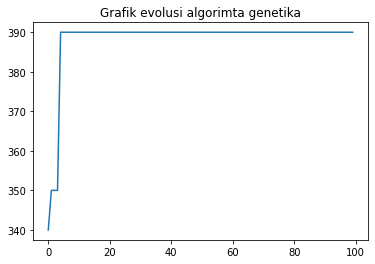

In [65]:
#tampilkan hasil optimasi
print(str(best_genotipe) + "=" + str(best_fitness) + "(" + str(idx_best_kromosom) +")" + "(" + str(total_berat) + "kg")
print("Best Kromosom =" + str(best_kromosom))
plt.title("Grafik evolusi algorimta genetika")
plt.plot(list_best_fitness)
plt.show(block=False)

